In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import glob
%matplotlib inline

In [5]:
def load_summary(filename):
    dtype=[('minr', 'f8'),
           ('maxr', 'f8'), 
           ('ca_ratio', 'f8'),
           ('ba_ratio', 'f8'),
           ('a', 'f8'),
           ('center', 'f8'),
           ('width', 'f8'),
           ('mu', 'f8')]
    summary = np.loadtxt(filename, dtype=dtype)    
    return summary

In [42]:
def load_experiment(input_path="../data/mstar_selected_summary/vmax_sorted/", fixed_number=False):
    files = glob.glob(input_path+"M31_group_*")
    group_id = []
    for f in files:
        i = int(f.split("_")[-5])
        if i not in group_id:
            group_id.append(i)
    print(group_id, len(group_id))

    n_groups = len(group_id)

    fields = ['width','mu', 'a', 'ba_ratio', 'ca_ratio']
    M31_all = {}
    MW_all = {}

    for field in fields:
        M31_all[field] = np.ones(n_groups)
        MW_all[field] = np.ones(n_groups)
        M31_all[field+'_sigma'] = np.ones(n_groups)
        MW_all[field+'_sigma'] = np.ones(n_groups)
        
        M31_all[field+'_random'] = np.ones(n_groups)
        MW_all[field+'_random'] = np.ones(n_groups)
        M31_all[field+'_random_sigma'] = np.ones(n_groups)
        MW_all[field+'_random_sigma'] = np.ones(n_groups)
    

    for g in range(n_groups):
        if fixed_number:
            n_iter = np.arange(10)
        else:
            n_iter = np.arange(11,16)
        MW_summary = {}
        M31_summary = {}
    
        for i in n_iter:
            if fixed_number:
                filename_MW = os.path.join(input_path,"MW_group_{}_nmax_{}_iter_{}.dat".format(group_id[g], 11, i))
                filename_M31 = os.path.join(input_path,"M31_group_{}_nmax_{}_iter_{}.dat".format(group_id[g],11, i))
            else:
                filename_MW = os.path.join(input_path,"MW_group_{}_nmax_{}_iter_{}.dat".format(group_id[g], i, 0))
                filename_M31 = os.path.join(input_path,"M31_group_{}_nmax_{}_iter_{}.dat".format(group_id[g], i, 0))

            MW_summary[i] = load_summary(filename_MW)
            M31_summary[i] = load_summary(filename_M31)
    
        for field in fields:
            a = []
            b = []
            a_random = []
            b_random = []
            for i in n_iter:
                data = M31_summary[i]
                a.append(data[field][0])
                a_random.append(data[field][1:])
        
                data = MW_summary[i]
                b.append(data[field][0])
                b_random.append(data[field][1:])
    
            M31_all[field][g] = np.average(a)
            MW_all[field][g] = np.average(b)
            M31_all[field+'_sigma'][g] = np.std(a)
            MW_all[field+'_sigma'][g] = np.std(b)
            M31_all[field+'_random'][g] = np.average(a_random)
            MW_all[field+'_random'][g] = np.average(b_random)
            M31_all[field+'_random_sigma'][g] = np.std(a_random)
            MW_all[field+'_random_sigma'][g] = np.std(b_random)
    return M31_all, MW_all

In [43]:
in_path = "../data/mstar_selected_summary/random_sorted/"
M31_sim_rand, MW_sim_rand= load_experiment(input_path=in_path, fixed_number=True)

[0, 10, 11, 13, 14, 16, 18, 1, 20, 21, 22, 24, 25, 2, 3, 4, 5, 6, 8, 9] 20


In [44]:
in_path = "../data/mstar_selected_summary/vmax_sorted/"
M31_sim_vmax, MW_sim_vmax = load_experiment(input_path=in_path, fixed_number=False)

[0, 10, 11, 13, 14, 16, 18, 1, 20, 21, 22, 24, 25, 2, 3, 4, 5, 6, 8, 9] 20


In [45]:
in_path = "../data/obs_summary/random_sorted/"
M31_obs_rand, MW_obs_rand= load_experiment(input_path=in_path, fixed_number=True)

[0] 1


In [68]:
in_path = "../data/obs_summary/vmag_sorted/"
M31_obs_vmag, MW_obs_vmag= load_experiment(input_path=in_path, fixed_number=False)

[0] 1


In [204]:
def comparison_plot(field):
    xrange = {'mu':[0,1], 'ca_ratio':[0.4, 0.9], 'ba_ratio':[0.75, 1.0], 'width':[0,120]}
    yrange = {'mu':[0,1], 'ca_ratio':[0.4, 0.9], 'ba_ratio':[0.75, 1.0], 'width':[0,120]}
    location = {'mu':[4,4], 'ca_ratio':[0, 0], 'ba_ratio':[3, 3], 'width':[2,2]}
    
    x = np.linspace(-1.0,200,5)
    fig = plt.figure(1, figsize=(13,6))
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=25)

    plt.subplot(121)
    plt.title('Ranked')
    plt.errorbar(M31_obs_vmag[field], MW_obs_vmag[field],
                 xerr=M31_obs_vmag[field+'_sigma'], yerr=MW_obs_vmag[field+'_sigma'], 
                 fmt='*', markersize=30, color='black', alpha=0.9, label='Obs.')
    plt.errorbar(M31_sim_vmax[field], MW_sim_vmax[field],
                 xerr=M31_sim_vmax[field+'_sigma'], yerr=MW_sim_vmax[field+'_sigma'], 
                 fmt='o', markersize=10, color='black', alpha=0.5, label='Sim.')
    plt.plot(x,x, color='black', linewidth=1.0, alpha=0.4)
    
    plt.legend(loc=location[field][0])
    plt.xlim(xrange[field])
    plt.ylim(yrange[field])

    plt.subplot(122)
    plt.title('Bootstrapped')
    plt.errorbar(M31_obs_rand[field], MW_obs_rand[field],
                 xerr=M31_obs_rand[field+'_sigma'], yerr=MW_obs_rand[field+'_sigma'], 
                 fmt='*', markersize=30, color='black', alpha=0.9, label='Obs')
    plt.errorbar(M31_sim_rand[field], MW_sim_rand[field],
                 xerr=M31_sim_rand[field+'_sigma'], yerr=MW_sim_rand[field+'_sigma'], 
                 fmt='o', markersize=10, color='black', alpha=0.5, label='Sim.')
    plt.plot(x,x, color='black', linewidth=1.0, alpha=0.4)


    plt.legend(loc=location[field][1])
    plt.xlim(xrange[field])
    plt.ylim(yrange[field])

#plt.show()

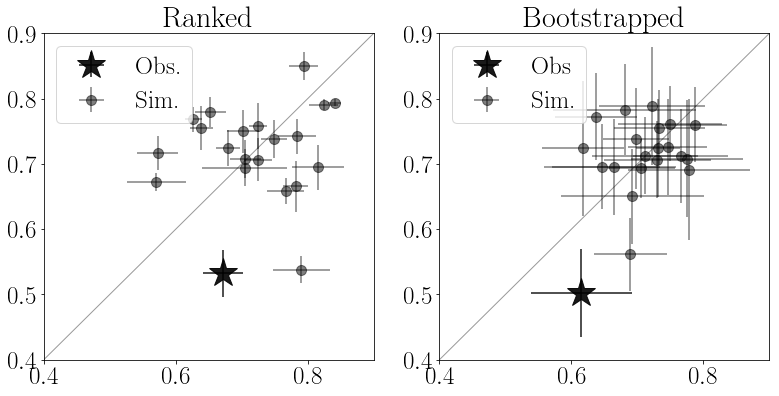

In [205]:
comparison_plot('ca_ratio')

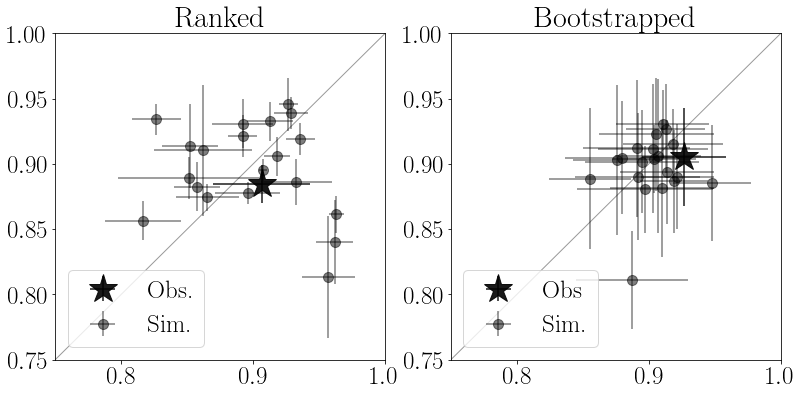

In [206]:
comparison_plot('ba_ratio')

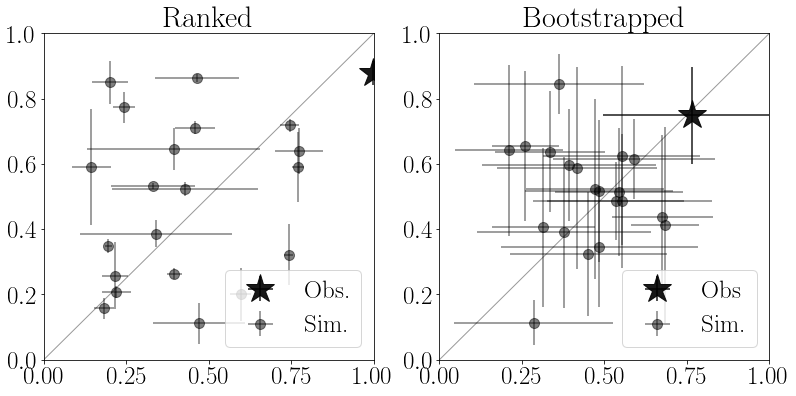

In [207]:
comparison_plot('mu')

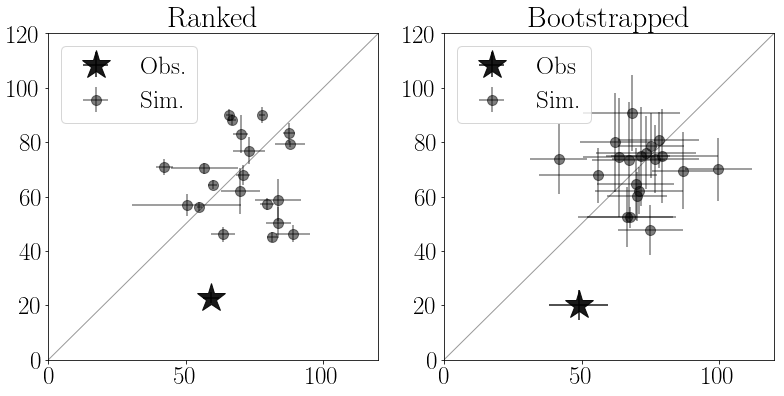

In [208]:
comparison_plot('width')

In [7]:
def plot_alignment(M31_summary, MW_summary, n_sat, output_name="mu_lg"):
    final_n = n_sat[-1]
    n_iter = len(n_sat)
    column = 7
    MW_obs_mu_plane = np.ones(n_iter)
    M31_obs_mu_plane = np.ones(n_iter)
    MW_randomized = np.ones(n_iter)
    M31_randomized = np.ones(n_iter)
    MW_randomized_std = np.ones(n_iter)
    M31_randomized_std = np.ones(n_iter)
    for i in range(n_iter):
        data_M31 = M31_summary[n_sat[i]]
        M31_obs_mu_plane[i] = np.abs(data_M31[0,column])
        M31_randomized[i] = np.mean(np.abs(data_M31[:,column]))
        M31_randomized_std[i] = np.std(np.abs(data_M31[:,column]))
    
        data_MW = MW_summary[n_sat[i]]
        MW_obs_mu_plane[i] = np.abs(data_MW[0,column])
        MW_randomized[i] = np.mean(np.abs(data_MW[:,column]))
        MW_randomized_std[i] = np.std(np.abs(data_MW[:,column]))

    data_M31 = M31_summary[final_n]
    data_MW = MW_summary[final_n]

    fig = plt.figure(1, figsize=(13,6))
    #fig.tight_layout()
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=25)

    plt.subplot(121)
    plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black')
    plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
#plt.hist2d(np.abs(data_M31[:,column]), np.abs(data_MW[:,column]), bins=40, cmap='gray_r', label='Randomized')

    plt.xticks(np.arange(0,2,0.2))
    plt.yticks(np.arange(0,2,0.2))
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel(r"M31 $\hat{I}_a\cdot \hat{r}_{AB} $")
    plt.ylabel(r"MW $\hat{I}_a\cdot \hat{r}_{AB} $")
    plt.legend(loc=3)

    plt.subplot(122)
    
    plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
    plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
    #plt.yticks(np.arange(0,1,0.2))
    #plt.xticks(np.arange(1,25,1))
    #plt.xlim([11,max(n_sat)])
    #plt.ylim([0,1])
    plt.ylabel(r"$ \hat{I}_a \cdot \hat{r}_{AB}$")
    plt.xlabel(r"Number of Satellites")
    plt.legend()

    plt.tight_layout()
    plt.savefig("../paper/{}.pdf".format(output_name), bbox_inches='tight')

In [8]:
def plot_width(M31_summary, MW_summary, n_sat, output_name="planewidth_lg"):

    final_n = n_sat[-1]
    n_iter = len(n_sat)
    column = 6
    MW_obs_mu_plane = np.ones(n_iter)
    M31_obs_mu_plane = np.ones(n_iter)
    MW_randomized = np.ones(n_iter)
    M31_randomized = np.ones(n_iter)
    MW_randomized_std = np.ones(n_iter)
    M31_randomized_std = np.ones(n_iter)
    for i in range(n_iter):
        data_M31 = M31_summary[n_sat[i]]
        M31_obs_mu_plane[i] = np.abs(data_M31[0,column])
        data_MW = MW_summary[n_sat[i]]
        MW_obs_mu_plane[i] = np.abs(data_MW[0,column])

        M31_randomized[i] = np.mean(np.abs(data_M31[:,column]))
        M31_randomized_std[i] = np.std(np.abs(data_M31[:,column]))
        MW_randomized[i] = np.mean(np.abs(data_MW[:,column]))
        MW_randomized_std[i] = np.std(np.abs(data_MW[:,column]))
    
    data_M31 = M31_summary[final_n]
    data_MW = MW_summary[final_n]

    fig = plt.figure(1, figsize=(13,6))
    #fig.tight_layout()
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=25)

    plt.subplot(121)
    plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black') 
    plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')



    #plt.xticks(np.arange(0,200,10))
    #plt.yticks(np.arange(0,200,10))
    #plt.ylim([0,60])
    #plt.xlim([40,100])
    plt.xlabel(r"M31 Plane Width [kpc]")
    plt.ylabel(r"MW Plane Width [kpc]")
    plt.legend(loc=4)

    plt.subplot(122)
    plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
    plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
    #plt.xticks(np.arange(10,30,5))
    plt.ylabel(r"Plane Width [kpc]")
    plt.xlabel(r"Number of Satellites")
    plt.legend()

    plt.tight_layout()
    plt.savefig("../paper/{}.pdf".format(output_name), bbox_inches='tight')

In [9]:
n_sat = np.arange(11,16)
MW_summary = {}
M31_summary = {}
for i in n_sat:
    filename_MW = "../data/obs_summary/halo_MW_nmax_{}.dat".format(i)
    MW_summary[i] = np.loadtxt(filename_MW)
    filename_M31 = "../data/obs_summary/halo_M31_nmax_{}.dat".format(i)
    M31_summary[i] = np.loadtxt(filename_M31)

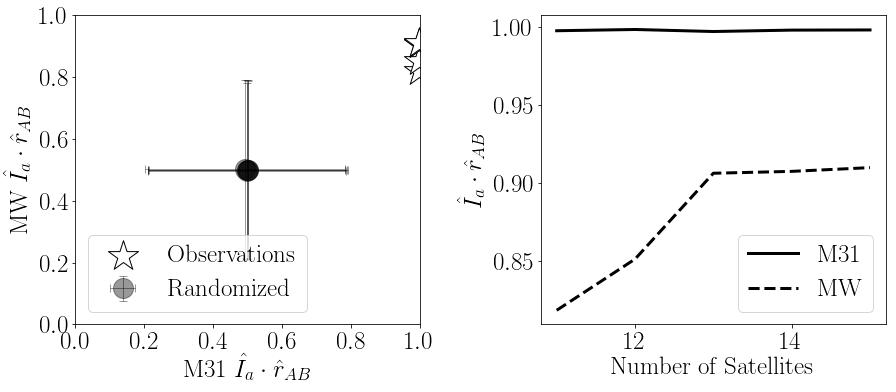

In [11]:
plot_alignment(M31_summary, MW_summary, n_sat)

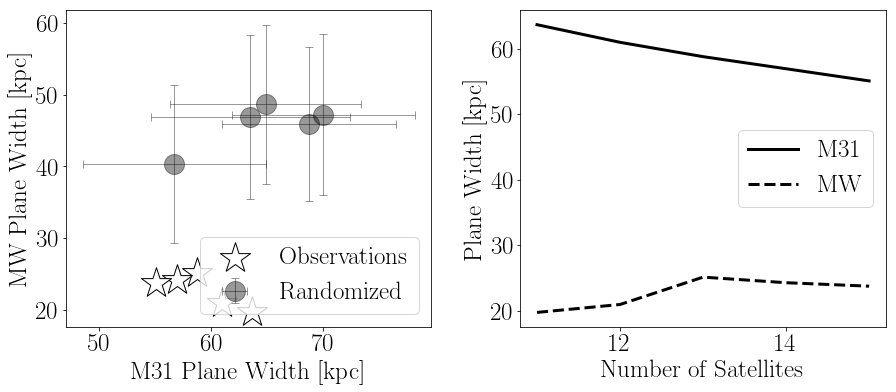

In [12]:
plot_width(M31_summary, MW_summary, n_sat)

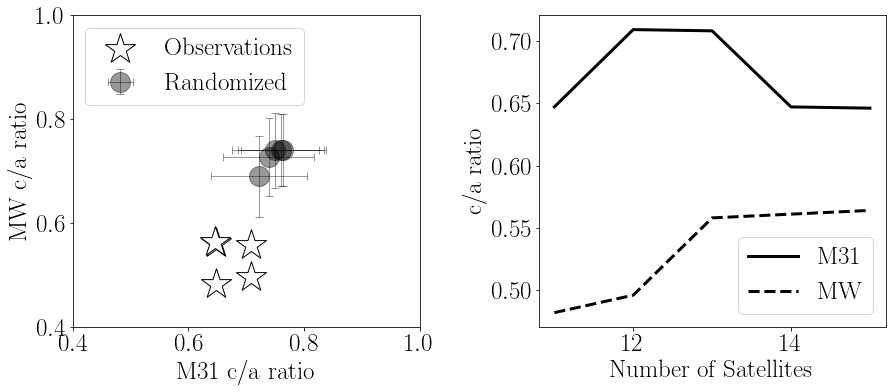

In [16]:
final_n = n_sat[-1]
final_n = n_sat[-1]
n_iter = len(n_sat)
column_CA = 2
MW_obs_mu_plane = np.ones(n_iter)
M31_obs_mu_plane = np.ones(n_iter)
MW_randomized = np.ones(n_iter)
M31_randomized = np.ones(n_iter)
MW_randomized_std = np.ones(n_iter)
M31_randomized_std = np.ones(n_iter)
for i in range(n_iter):
    data_M31 = M31_summary[n_sat[i]]
    ca_ratio_M31 = data_M31[:,column_CA]
    M31_obs_mu_plane[i] = ca_ratio_M31[0]
    
    data_MW = MW_summary[n_sat[i]]
    ca_ratio_MW = data_MW[:,column_CA]
    MW_obs_mu_plane[i] = ca_ratio_MW[0]
    
    M31_randomized[i] = np.mean(ca_ratio_M31)
    M31_randomized_std[i] = np.std(ca_ratio_M31)
    MW_randomized[i] = np.mean(ca_ratio_MW)
    MW_randomized_std[i] = np.std(ca_ratio_MW)

data_M31 = M31_summary[final_n]
data_MW = MW_summary[final_n]

fig = plt.figure(1, figsize=(13,6))
#fig.tight_layout()
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.subplot(121)
plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black') 
plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
#plt.hist2d(ca_ratio_M31, ca_ratio_MW, bins=40, cmap='gray_r', label='Randomized')

plt.xticks(np.arange(0,2,0.2))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([0.4,1.0])
plt.ylim([0.4,1.0])
plt.xlabel(r"M31 c/a ratio ")
plt.ylabel(r"MW c/a ratio")
plt.legend(loc=2)

plt.subplot(122)
plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
#plt.xticks(np.arange(10,30,5))
plt.ylabel(r"c/a ratio")
plt.xlabel(r"Number of Satellites")
plt.legend()

plt.tight_layout()
plt.savefig("../paper/ca_ratio_lg.pdf", bbox_inches='tight')

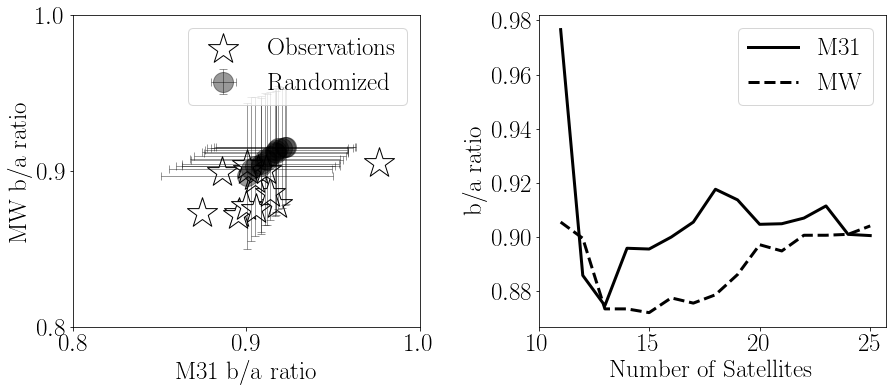

In [14]:
final_n = n_sat[-1]
final_n = n_sat[-1]
column_B = 3
column_A = 4
MW_obs_mu_plane = np.ones(n_iter)
M31_obs_mu_plane = np.ones(n_iter)
MW_randomized = np.ones(n_iter)
M31_randomized = np.ones(n_iter)
MW_randomized_std = np.ones(n_iter)
M31_randomized_std = np.ones(n_iter)
for i in range(n_iter):
    data_M31 = M31_summary[n_sat[i]]
    ba_ratio_M31 = np.sqrt(data_M31[:,column_B]/data_M31[:,column_A])
    M31_obs_mu_plane[i] = ba_ratio_M31[0]
    
    data_MW = MW_summary[n_sat[i]]
    ba_ratio_MW = np.sqrt(data_MW[:,column_B]/data_MW[:,column_A])
    MW_obs_mu_plane[i] = ba_ratio_MW[0]
        
    M31_randomized[i] = np.mean(ba_ratio_M31)
    M31_randomized_std[i] = np.std(ba_ratio_M31)
    MW_randomized[i] = np.mean(ba_ratio_MW)
    MW_randomized_std[i] = np.std(ba_ratio_MW)


data_M31 = M31_summary[final_n]
data_MW = MW_summary[final_n]

fig = plt.figure(1, figsize=(13,6))
#fig.tight_layout()
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.subplot(121)
 #facecolors='white')
plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black')
#plt.hist2d(ba_ratio_M31, ba_ratio_MW, bins=40, cmap='gray_r', label='Randomized')

plt.xticks(np.arange(0,2,0.1))
plt.yticks(np.arange(0,2,0.1))
plt.xlim([0.8,1.0])
plt.ylim([0.8,1.0])
plt.xlabel(r"M31 b/a ratio ")
plt.ylabel(r"MW b/a ratio")
plt.legend(loc=1)

plt.subplot(122)
plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
plt.xticks(np.arange(10,30,5))
plt.ylabel(r"b/a ratio")
plt.xlabel(r"Number of Satellites")
plt.legend()

plt.tight_layout()
plt.savefig("../paper/ba_ratio_lg.pdf", bbox_inches='tight')

In [125]:
group_id = 22
n_sat = np.arange(11,16)
n_iter = len(n_sat)
MW_summary = {}
M31_summary = {}
for i in n_sat:
    filename_MW = "../data/mstar_selected_summary/Illustris_MW_group_{}_nmax_{}.dat".format(group_id, i)
    MW_summary[i] = np.loadtxt(filename_MW)
    filename_M31 = "../data/mstar_selected_summary/Illustris_M31_group_{}_nmax_{}.dat".format(group_id, i)
    M31_summary[i] = np.loadtxt(filename_M31)



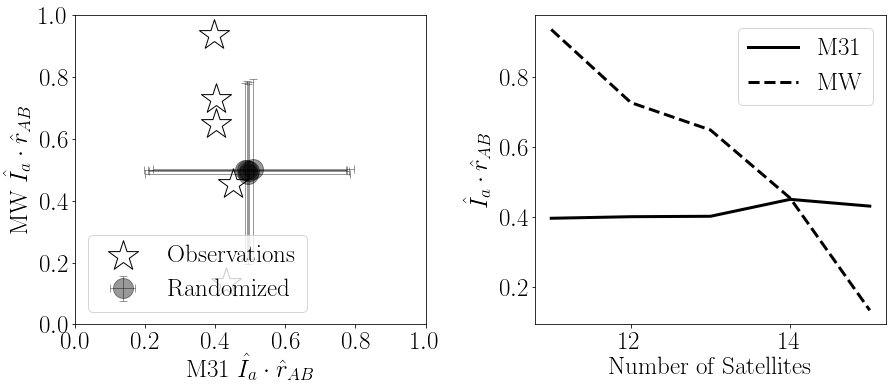

In [126]:
plot_alignment(M31_summary, MW_summary, n_sat, output_name="mu_group_{}".format(group_id))


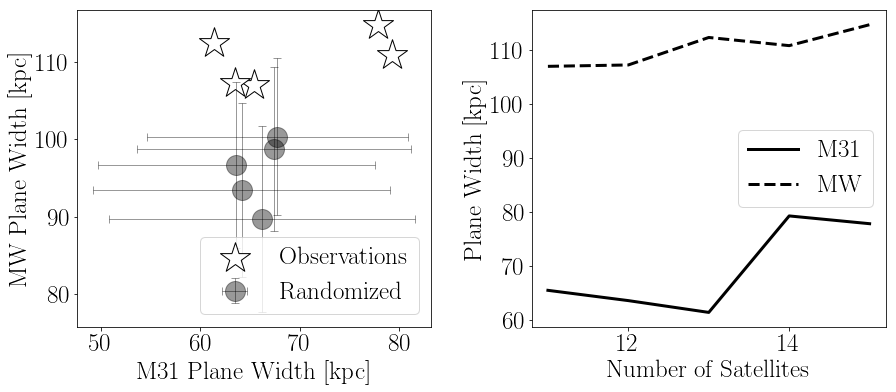

In [127]:
plot_width(M31_summary, MW_summary, n_sat, output_name="planewidth_{}".format(group_id))